# Data Analysis on Faculty Salary and Publication

Author: Shaoyu Liu <br />
Date: 10/10/2021

## Part 2: University of Michigan
[Section 1: Descriptive Statistics for University of Michigan Salary and Publication Data](#section1) <br /> 
[Section 2: Relationship between Salary and Publication](#section2) <br /> 
[Section 3: Tenure and Salary Analysis](#section3) <br /> 



In [60]:
import os
import warnings
warnings.simplefilter('ignore')

import pandas as pd
#pd.options.display.float_format = "{:,.2f}".format

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir('/Users/apple/Dropbox/web_scrapping_UC/temp/')

In [61]:
#load Michigan publication and salary data
umi_pub = pd.read_csv('scopus_michigan.csv')
umi_pub['university'] = umi_pub['university'].replace('UM_FLINT','Flint')
umi_pub['university'] = umi_pub['university'].replace('UM_DEARBORN','Dearborn')

umi_salary = pd.read_stata('michigan906.dta')
umi_salary.rename(columns = {'salary':'regular_pay','salary_total':'gross_pay'}, inplace = True)

#load citescore for journals
journal_rnk = pd.read_csv('/Users/apple/Dropbox/web_scrapping_UC/scopus/scopus_aux/citescore.csv')
journal_rnk.rename(columns = {'year':'pub_yr'}, inplace = True)
journal_rnk2019 = pd.read_csv('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/scopus_journal_ranking_2019.csv')

#load research area code
asjc = pd.read_csv('/Users/apple/Dropbox/web_scrapping_UC/scopus/scopus_aux/scopus_journal_classify_updated_copy.csv')

#merge citescore into publication data
### articles with no citescore is filled with zero ... including all publications before 1990 ###
umi_pub = umi_pub.merge(journal_rnk[['source_id','pub_yr','citescore']], on = ['pub_yr','source_id'], how = 'left')
umi_pub['citescore'] = umi_pub['citescore'].fillna(0)

In [ ]:
umi_salary.groupby(['university','first_name','last_name','yr'])

In [46]:
#for Michigan

# for (university, name) in a year with > 1 ros, if rank are different (excluding the case when one is NAN)
# then it is likely these are two different persons.
umi_salary = umi_salary.reset_index().rename(columns = {'index':'idx'})

umi_a = umi_salary[umi_salary.duplicated(['university','first_name','last_name','yr'],keep=False)].sort_values(['university','first_name','last_name','yr'])

In [47]:
umi_a1 = umi_a[umi_a['rank'].notnull()].groupby(['university','first_name','last_name','yr'])['rank'].nunique().reset_index()

In [34]:
#SUSPICIOUS PROFILES WITH DIFFERENT RANKS OF SAME NAME IN THE SAME YEAR
umi_a2 = umi_a1[umi_a1['rank'] > 1]

In [42]:
umi_salary_check = umi_salary.merge(umi_a2[['university','first_name','last_name']], on = ['university','first_name','last_name']).sort_values(['university','first_name','last_name','yr'])

In [62]:
len(umi_salary)

115120

In [43]:
umi_salary_check

,idx,university,field,first_name,last_name,yr,title,rank,prof_type,fte,regular_pay,gross_pay,pay_term,gen_fund,college,department,division,cip_code
8531,3201,Ann Arbor,,Adam J,Matzger,2002,ASST PROFESSOR,Assistant,Professorial,0.0,NaN,0.00,12-Month,0.00,College of Engineering,Macromolecular Science & Engineering,,
8532,3411,Ann Arbor,Chemistry,Adam J,Matzger,2002,ASST PROFESSOR,Assistant,Professorial,1.0,56400.00,56400.00,9-Month,56400.00,"College of Literature, Science, and the Arts",Chemistry,,40.05
8533,9050,Ann Arbor,,Adam J,Matzger,2003,ASST PROFESSOR,Assistant,Professorial,0.0,NaN,0.00,12-Month,0.00,College of Engineering,Macromolecular Science & Engineering,,
8534,9250,Ann Arbor,Chemistry,Adam J,Matzger,2003,ASST PROFESSOR,Assistant,Professorial,1.0,62500.00,62500.00,9-Month,62500.00,"College of Literature, Science, and the Arts",Chemistry,,40.05
8535,15332,Ann Arbor,,Adam J,Matzger,2004,ASST PROFESSOR,Assistant,Professorial,0.0,NaN,0.00,12-Month,0.00,College of Engineering,Macromolecular Science & Engineering,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,42671,Flint,"Education, Other",Sapna,Vyas,2008,ASSOC PROFESSOR,Associate,Professorial,1.0,60639.08,60639.08,9-Month,60639.08,,Education,,13.99
9975,42685,Flint,"Education, Other",Sapna,Vyas,2008,ASST PROFESSOR,Assistant,Professorial,0.0,NaN,121278.16,8-Month,0.00,,Education,,13.99
9976,48994,Flint,"Education, Other",Sapna,Vyas,2009,ASSOC PROFESSOR,Associate,Professorial,1.0,62458.25,62458.25,9-Month,62458.25,,Education,,13.99
9977,55432,Flint,"Education, Other",Sapna,Vyas,2010,ASSOC PROFESSOR,Associate,Professorial,1.0,64332.00,64332.00,9-Month,64332.00,,Education,,13.99


In [48]:
asst = ['ASST PROFESSOR','CLINICAL ASST PROF','RESEARCH ASST PROFESSOR','ASST PROF/POSTDOC SCH-MSF','ASST PROF/POST DOC/PRESIDE FEL',
'ASST PROF/POST DOC']
assoc = ['ASSOC PROFESSOR','RESEARCH ASSOCIATE PROFESSOR','CLINICAL ASSOC PROF','CLINICAL ASSOC PROF II','CLINICAL ASSOC PROF I']
full = ['PROFESSOR','CLINICAL PROFESSOR','RESEARCH PROFESSOR'] 

umi_salary = umi_salary[umi_salary['title'].isin(asst + assoc + full)]

<a id='section1'></a>

## I. Descriptive Statistics for Salary and Publication Data

Total number of individuals 12,607. Total matched individuals 14,354

## I. A. Salary Data

<AxesSubplot:title={'center':'Number of Observations in Salary Data by Year'}, xlabel='year', ylabel='number of observations'>

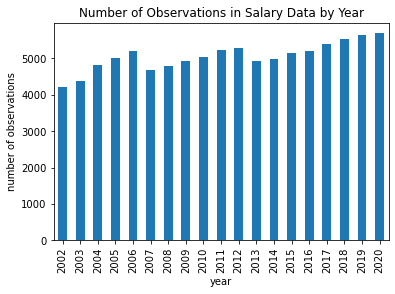

In [49]:
# number of observations and year
umi_salary.groupby(['yr'])['title'].count().plot(kind = 'bar', 
                                               xlabel ='year',
                                               ylabel = 'number of observations', 
                                               title = 'Number of Observations in Salary Data by Year')

to do: Assign individuals ID to identify unique persons
1. in the same year, if (first_name, last_name, university) pair is associated with multiple departments, and has same title, then it is the same person. 
2. in the same year, if (first_name, last_name, university) pair is associated with multiple departments, but has different title, then it is different person.

In [52]:
umi_salary_a = umi_salary[umi_salary.duplicated(['first_name','last_name','university','field','yr'],keep=False)].sort_values(['first_name','last_name','university','yr'])
umi_salary_b = umi_salary.drop_duplicates(['first_name','last_name','university','field','yr'],keep=False)

In [53]:
#drop mulitiple observations which in the same year have multiple titles...
#These are faculties who have appointments in different departments
umi_salary_a = umi_salary_a[umi_salary_a['regular_pay'].notnull()]
umi_salary_a = umi_salary_a.drop_duplicates(['first_name','last_name','university','field','yr'])
umi_salary = pd.concat([umi_salary_a, umi_salary_b], ignore_index = True)

In [54]:
print('pct of observations kept:', len(umi_salary)/115120*100)

pct of observations kept: 83.26528839471855


In [55]:
len(umi_salary.drop_duplicates(['first_name','last_name','university']))

9957

In [56]:
len(umi_salary.drop_duplicates(['first_name','last_name','university','field']))

12444

Text(0.5, 1.0, 'Mean salary by university')

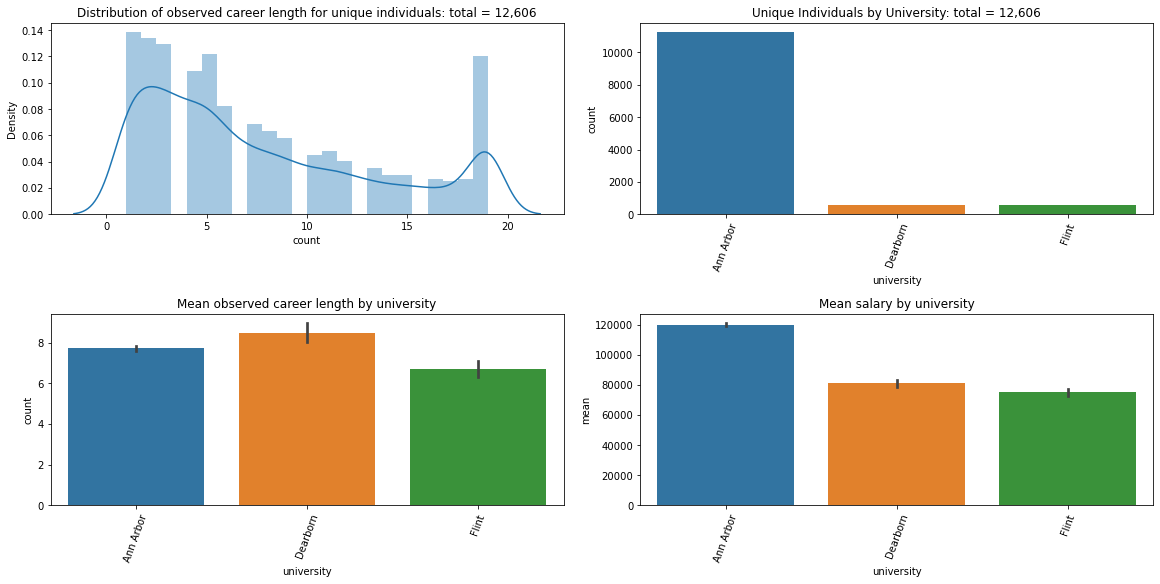

In [57]:
df1 = umi_salary.groupby(['first_name','last_name','university','field'])['gross_pay'].agg(['count','mean']).reset_index()
df2 = df1.groupby(['university'])['first_name'].count().reset_index().rename(columns = {'first_name':'count'})

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8), constrained_layout=True)
#fig.tight_layout()
sns.distplot(df1['count'], ax = ax[0,0])
ax[0,0].set_title('Distribution of observed career length for unique individuals: total = 12,606')

sns.barplot(x = df2['university'], y = df2['count'], ax = ax[0,1])
ax[0,1].tick_params(axis='x', rotation=70)
ax[0,1].set_title('Unique Individuals by University: total = 12,606')

sns.barplot(x = df1['university'], y = df1['count'], ax = ax[1,0])
ax[1,0].tick_params(axis='x', rotation=70)
ax[1,0].set_title('Mean observed career length by university')

sns.barplot(x = df1['university'], y = df1['mean'], ax = ax[1,1])
ax[1,1].tick_params(axis='x', rotation=70)
ax[1,1].set_title('Mean salary by university')

In [58]:
#salary standard deviation by field and rank
fields = ['Economics','Mathematics','Sociology',
              'Electrical and Computer Engineering', 'Business', 'Internal Medicine', 
              'Psychology','Chemistry','Cellular Biology', 'History',
              'Foreign Language/Area Studies','Physics and Astronomy','Medicine','Law','Theater and Dance']

umi_salary[umi_salary['field'].isin(fields)].groupby(['field','rank'])[['gross_pay','regular_pay']].agg(['median','mean','std','max','min','count'])

gross_pay                 \
                                                   median           mean   
field                               rank                                   
Business                            Assistant  141000.000  144432.760040   
                                    Associate  152278.840  155608.190328   
                                    Full       188500.000  185606.916404   
Cellular Biology                    Assistant   79733.330   73797.942363   
                                    Associate   94458.000   96219.050000   
                                    Full       126157.000  124737.847427   
Chemistry                           Assistant   82697.000   75618.789100   
                                    Associate  104594.000   97232.956449   
                                    Full       136609.000  121129.003756   
Economics                           Assistant  114000.000  109637.666407   
                                    Associate  128000.000  117436.324342   
                                    Full       200000.000  184818.505398   
Electrical and Computer Engineering Assistant   95000.000   94061.539724   
                                    Associate  107826.500  104958.437414   
                                    Full       150000.000  150511.927700   
Foreign Language/Area Studies       Assistant   62334.000   64061.059014   
                                    Associate   80000.000   80797.415671   
                                    Full       113785.000  118906.132355   
History                             Assistant   62183.930   62717.587367   
                                    Associate   80000.000   80385.292437   
                                    Full       117400.000  116167.873668   
Internal Medicine                   Assistant  160027.800  152684.890490   
                                    Associate  186600.000  176577.504154   
                                    Full       216616.950  195270.955815   
Law                                 Assistant  121500.000  117407.499974   
                                    Associate         NaN            NaN   
                                    Full       216500.000  216559.388998   
Mathematics                         Assistant   48500.000   56403.743485   
                                    Associate   91003.870   90257.629327   
                                    Full       129857.000  128350.179722   
Medicine                            Assistant  103908.260   99431.255034   
                                    Associate  123180.965  121077.397794   
                                    Full       186449.740  200389.465694   
Physics and Astronomy               Assistant   80000.000   77970.716960   
                                    Associate   99250.000   94535.965885   
                                    Full       127534.500  126982.065535   
Psychology                          Assistant   61408.000   60505.354500   
                                    Associate   76317.080   75909.410973   
                                    Full        93503.850   93395.734762   
Sociology                           Assistant   82928.500   83423.739933   
                                    Associate   98000.000  100771.473631   
                                    Full       136499.000  122448.027707   
Theater and Dance                   Assistant   62560.065   63032.534302   
                                    Associate   77011.500   79541.972851   
                                    Full       103488.000  109766.351791   

                                                                        \
                                                        std        max   
field                               rank                                 
Business                            Assistant  40650.253859  268000.00   
                                    Associate  50994.839864  327008.00   
                             

## I. B. Michigan Publication
Note this uses the most stringent criteria for matching names
(last_name, first_name, university) == (author_id)

### Visualize number of unique individuals and those that matched to Scopus profile by university

In [59]:
uc_matched = umi_pub.groupby(['university'])['author_id'].nunique().reset_index().rename(columns = {'author_id': 'count'})
uc_matched2 = df2.merge(uc_matched, on = ['university'], how = 'left').fillna(0).sort_values(['count_x'], ascending=False)
uc_matched2['pct matched %'] = uc_matched2['count_y'] / uc_matched2['count_x'] * 100
uc_matched2.columns = ['univesity','total individuals', 'matched individuals', 'pct matched %']
uc_matched2['matched individuals']= uc_matched2['matched individuals'].astype('int')
uc_matched2

,univesity,total individuals,matched individuals,pct matched %
0,Ann Arbor,11269,6563,58.239418
1,Dearborn,611,349,57.119476
2,Flint,564,288,51.063830


In [67]:
uc_matched2.sum(axis =0)

univesity              Ann ArborDearbornFlint
total individuals                       12444
matched individuals                      7200
pct matched %                      166.422724
dtype: object

In [39]:
#author year level publications
uc_pub_a = umi_pub.groupby(['author_id','pub_yr']).agg({'scopus_id':'count', 'cites':'mean','citescore': 'sum', 'rank_author':'mean','num_coauthor':'mean'}).reset_index()
uc_pub_a = uc_pub_a.merge(umi_pub[['university','author_id','first_name','last_name']].drop_duplicates(), on = ['author_id'], how = 'left')
uc_pub_a.rename(columns = {'pub_yr':'yr'}, inplace = True)

#merge in min and max year of publication for each author
uc_pub_a_yrs = uc_pub_a.groupby(['author_id'])['yr'].agg(['max','min']).reset_index()
uc_pub_a = uc_pub_a.merge(uc_pub_a_yrs, on = ['author_id'], how = 'left')
uc_pub_a.rename(columns = {'max':'max_year', 'min':'min_year'}, inplace = True)
uc_pub_a.rename(columns = {'scopus_id':'count_pubs','cites':'mean_cites','citescore':'sum_citescore','rank_author':'mean_rank_author','num_coauthor':'mean_num_coauthor'}, inplace = True)

In [54]:
uc_pub_a_trim = uc_pub_a[(uc_pub_a['yr'] >= 2002) & (uc_pub_a['yr'] <= 2020)]
#impute missing year for uc_pub_a in year interval [2000, 2021]
#839 out of 14354 UNIUQE INDIVIDUALS DROPPED (WHO PUBISH ONLY BEFORE 2000)
#64% of person-year level observations dropped.
len(uc_pub_a_trim)/len(uc_pub_a)

0.6386376703140257

In [55]:
#create balanced author-year panel - impute missing years
authid = uc_pub_a['author_id'].drop_duplicates().values
new_df = pd.DataFrame({'yr': list(range(2000, 2020)) * len(authid), 'author_id': [item for item in authid for i in range(20)]})
uc_pub_a1 = new_df.merge(uc_pub_a[['author_id','yr', 'count_pubs','mean_cites','sum_citescore', 'mean_rank_author','mean_num_coauthor']], on = ['yr','author_id'], how ='left')
uc_pub_a1 = uc_pub_a1.merge(uc_pub_a[['author_id','university','first_name','last_name','max_year','min_year']].drop_duplicates(), on = ['author_id'])
uc_pub_a1 = uc_pub_a1.fillna(0)

In [56]:
#author level publications
uc_pub_b = umi_pub.groupby(['author_id']).agg({'scopus_id':'count','cites':'mean','citescore':'sum','rank_author':'mean','num_coauthor':'mean','pub_yr':['max','min']}).reset_index()
uc_pub_b.columns = ['_'.join(col).strip() for col in uc_pub_b.columns.values]
uc_pub_b['career_length'] = uc_pub_b['pub_yr_max'] - uc_pub_b['pub_yr_min']
uc_pub_b = uc_pub_b.rename(columns = {'author_id_':'author_id'})
uc_pub_b = uc_pub_b.merge(umi_pub[['university','author_id','first_name','last_name']].drop_duplicates(), on = ['author_id'], how = 'left')

In [57]:
#descriptive stats for faculty career length by university in Scopus publication data
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)
uc_pub_b.groupby(['university'])['career_length'].agg(['mean','median','max','min', q25, q75, 'count'])

,mean,median,max,min,q25,q75,count
university,,,,,,,
Ann Arbor,21.167302,20.0,102.0,0.0,11.0,30.0,6563
Dearborn,15.988539,13.0,55.0,0.0,8.0,22.0,349
Flint,11.333333,10.0,46.0,0.0,2.0,17.0,288


In [58]:
#descriptive stats for faculty publications by university
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)
uc_pub_b.groupby(['university']).agg({'scopus_id_count':['mean','median','max','min', q25, q75, 'count'], 'cites_mean': ['mean','median','max','min', q25, q75, 'count']})

scopus_id_count                                cites_mean  \
                      mean median   max min q25 q75 count       mean   
university                                                             
Ann Arbor        65.078470     34  1691   1  11  82  6563  33.367414   
Dearborn         24.590258     12   217   1   5  30   349  16.898398   
Flint            12.690972      6   122   1   2  16   288  11.774174   

                                                                    
               median         max  min        q25        q75 count  
university                                                          
Ann Arbor   23.272727  543.909091  0.0  10.246951  44.000000  6563  
Dearborn    10.450000  136.548387  0.0   4.000000  20.548387   349  
Flint        6.690476  105.850000  0.0   2.200000  14.175000   288

<a id='section2'></a>

## II. Relationship between Salary and Publication between 2002-2020

In [59]:
#merge publication and salary data
uc_pub_c = uc_pub_a1.merge(umi_salary, on = ['university','first_name','last_name','yr'], how = 'left')
print(len(uc_pub_c))
#drop faculties that have multiple records in the same year 
#(those are faculties who have multiple department affiliations)
uc_pub_c = uc_pub_c.drop_duplicates(['author_id','yr'])
print(len(uc_pub_c))

152149
144000


In [60]:
# for each year t with salary, 
#compute total number of publications from year t-1 to t-3;
#compute sum of publication citescore from year t-1 to t-3

def compute_pub_lead(df):
    df['count_pubs_1'] = df['count_pubs'].shift(1)
    df['count_pubs_2'] = df['count_pubs'].shift(2)
    df['count_pubs_3'] = df['count_pubs'].shift(3)
    df['count_pubs_1_3'] = df[['count_pubs_1','count_pubs_2','count_pubs_3']].sum(axis = 1)
    
    df['sum_citescore_1'] = df['sum_citescore'].shift(1)
    df['sum_citescore_2'] = df['sum_citescore'].shift(2)
    df['sum_citescore_3'] = df['sum_citescore'].shift(3)
    df['sum_citescore_1_3'] = df[['sum_citescore_1','sum_citescore_2','sum_citescore_3']].sum(axis = 1)
    
    return df

In [61]:
uc_pub_d = uc_pub_c.groupby(['author_id']).apply(compute_pub_lead)

#remove years where the faculty has no salary data
uc_pub_e = uc_pub_d[uc_pub_d['gross_pay'].notnull()]

In [62]:
#mean and median number of publication per year for faculty grouped by department and rank, 2002-2020
fields = ['Economics','Mathematics','Sociology',
              'Electrical and Computer Engineering', 'Business', 'Internal Medicine', 
              'Psychology','Chemistry','Cellular Biology', 'History',
              'Foreign Language/Area Studies','Physics and Astronomy','Medicine','Law','Theater and Dance']
uc_pub_d[uc_pub_d['field'].isin(fields)].groupby(['rank','field'])['count_pubs'].agg(['median','mean','std'])

median      mean       std
rank      field                                                          
Assistant Business                                1.0  1.054602  1.449725
          Cellular Biology                        2.0  2.542017  2.328578
          Chemistry                               3.0  3.617391  3.016932
          Economics                               0.0  0.702439  1.059154
          Electrical and Computer Engineering     4.0  5.135977  4.117408
          Foreign Language/Area Studies           0.0  0.521311  0.888730
          History                                 0.0  0.406504  0.663293
          Internal Medicine                       1.0  2.628030  4.209989
          Law                                     0.0  0.620833  2.280072
          Mathematics                             1.0  1.225000  1.738067
          Medicine                                1.0  1.911111  2.714103
          Physics and Astronomy                   3.0  4.965318  5.222821
          Psychology                              1.0  1.285714  1.500000
          Sociology                               1.0  0.959184  1.283667
          Theater and Dance                       0.0  0.645963  1.276763
Associate Business                                1.0  1.011628  1.235345
          Cellular Biology                        2.0  2.578616  2.176932
          Chemistry                               2.0  3.481481  3.690979
          Economics                               2.0  1.866667  1.919553
          Electrical and Computer Engineering     5.0  5.915129  5.655888
          Foreign Language/Area Studies           0.0  0.514706  0.852676
          History                                 0.0  0.336066  0.709844
          Internal Medicine                       3.0  4.745523  7.203464
          Law                                     NaN       NaN       NaN
          Mathematics                             1.0  1.871795  2.093671
          Medicine                                3.0  3.543860  3.448966
          Physics and Astronomy                   5.0  6.631068  9.186510
          Psychology                              0.0  0.630000  1.203152
          Sociology                               0.0  1.080460  1.658091
          Theater and Dance                       0.0  0.439614  0.850457
Full      Business                                1.0  1.929969  2.805965
          Cellular Biology                        2.0  3.170635  3.246612
          Chemistry                               3.0  4.838542  5.493882
          Economics                               1.0  1.616352  2.239025
          Electrical and Computer Engineering     4.0  6.501742  6.863859
          Foreign Language/Area Studies           0.0  0.772074  1.419804
          History                                 0.0  0.694006  1.259544
          Internal Medicine                       5.0  7.172253  8.819888
          Law                                     0.0  0.834043  1.425011
          Mathematics                             1.0  1.800000  2.269179
          Medicine                                6.0  6.074627  4.645993
          Physics and Astronomy                   4.0  6.049383  7.544757
          Psychology                              0.0  0.461538  0.941615
          Sociology                               1.0  1.214286  1.582945
          Theater and Dance                       0.0  0.403509  0.827767

Text(0, 0.5, 'count - number of authors')

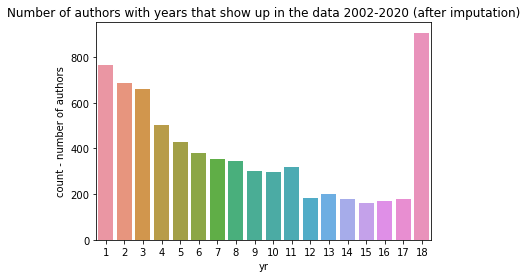

In [69]:
#note, this drops all obs that we do not observe salary.
sns.countplot(x = 'yr', data = uc_pub_e.groupby(['author_id'])['yr'].count().reset_index())
plt.title('Number of authors with years that show up in the data 2002-2020 (after imputation)')
plt.ylabel('count - number of authors')

Regression for correlation between publication and salary

$Log(Salary_{i,t}+1) = \alpha + \beta_t + \gamma_i + \theta \times \sum_{m = t-1}^{t-3} {Log(pub_{i, m}+1)} + \epsilon_{i,t}$

${pub_{i, m}}$ is number of publications or total citescore for author $i$ in year $m$.

In [65]:
#write data for STATA analysis of regressions
uc_pub_e.to_csv('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/umi_pub_e.csv', index = False)

<a id='section3'></a>

## III. Tenure and Salary Analysis
How much does a faculty's salary change if she gets promoted? (assistant to associate; associate to full)


In [12]:
def find_tenure_yr(df):
    """
    Include three extra columns to df for previous years rank and salary
    """
    df['prev_rank'] = df['rank'].shift(1)
    df['prev_gross_pay'] = df['gross_pay'].shift(1)
    df['prev_regular_pay'] = df['regular_pay'].shift(1)
    return df

def tenure_sum_stats(df, prev, now):
    """
    prev - rank in previous year - ['Assistant','Associate']
    now - rank in previous year - ['Associate','Full']
    """
    fields = ['Economics','Mathematics','Sociology',
              'Electrical and Computer Engineering', 'Business', 'Internal Medicine', 
              'Psychology','Chemistry','Cellular Biology',
              'Foreign Language/Area Studies','Physics and Astronomy','Law','Theater and Dance']
    
    df = df[df.field.isin(fields)]
    tenure = df[(df['prev_rank'] == prev) & (df['rank'] == now)]
    
    #deal with case of division by zero - remove those rows
    tenure = tenure[tenure['prev_gross_pay']!=0]
    tenure = tenure[tenure['prev_regular_pay']!=0]
    
    tenure['dif_gross'] = tenure['gross_pay'] - tenure['prev_gross_pay']
    tenure['dif_gross_pct'] = tenure['dif_gross'] / tenure['prev_gross_pay'] * 100
    tenure['dif_regular'] = tenure['regular_pay'] - tenure['prev_regular_pay']
    tenure['dif_regular_pct'] = tenure['dif_regular'] / tenure['prev_regular_pay']
    
    
    
    
    t1 = tenure.groupby(['field'])['dif_gross_pct'].agg(['mean','median','count','max','min']).sort_values(['median'], ascending=False).add_suffix('_gross').reset_index()
    t2 = tenure.groupby(['field'])['dif_regular_pct'].agg(['mean','median','count','max','min']).sort_values(['median'], ascending=False).add_suffix('_regular').reset_index()
    return t1.merge(t2, on=['field'])

In [13]:
#drop rows with same-named faculties who show up in the same field in a year.
umi_salary2 = umi_salary.drop_duplicates(['university','first_name','last_name','field','yr'])

#modify the umi_salary data to include previous year's salary and rank
umi_salary2['id'] = umi_salary2['university']+'_' + umi_salary2['field'] + '_'+umi_salary2['first_name']+'_'+umi_salary2['last_name']
umi_salary2 = umi_salary2.sort_values(['id','yr'])
umi_salary3 = umi_salary2.groupby(['id']).apply(find_tenure_yr)

### Salary Increase before/after Promotion
#### Promotion 1: Assistant -> Associate (Tenured)
Economics - when get tenured (17 cases), median increase of gross/median salary is about 18%. One of the highest increase compared to other disciplines. Also, very large standard deviation (mean increase is 25%) in terms of increase compared to other disciplines, suggesting high rewards for super stars.

#### Promotion 2: Associate -> Full
Economics - 9 cases, median increase of gross/median salary is about 16% / 12%. Comparable to other disciplines.

In [16]:
tenure_sum_stats(umi_salary3, prev = 'Assistant', now = 'Associate')

,field,mean_gross,median_gross,count_gross,max_gross,min_gross,mean_regular,median_regular,count_regular,max_regular,min_regular
0,Economics,25.264369,18.279570,17,73.728814,10.000000,0.262057,0.173673,17,1.736842,-0.413919
1,Mathematics,15.043313,13.677961,27,50.100330,-1.030928,0.155621,0.136780,27,0.904750,-0.505155
2,Psychology,12.403170,12.561102,8,12.749897,11.740282,0.124032,0.125611,8,0.127499,0.117403
3,Business,11.902423,10.481586,73,64.624094,0.000000,0.111563,0.104816,73,0.646241,-0.455357
4,Sociology,14.951658,10.149263,18,40.931373,9.625000,0.222769,0.100000,18,1.269999,-0.369483
5,Physics and Astronomy,12.239536,10.009871,37,38.817481,9.491525,0.152562,0.100010,37,1.230652,-0.450001
6,Chemistry,13.245726,10.000681,31,58.853625,0.000000,0.076404,0.100005,31,0.588536,-0.772112
7,Foreign Language/Area Studies,11.550390,10.000509,58,33.192235,8.000162,0.196017,0.100004,58,3.968806,-0.455051
8,Cellular Biology,10.324684,10.000110,27,13.300000,2.999940,0.103247,0.100001,27,0.133000,0.029999
9,Theater and Dance,11.209982,10.000000,64,27.919769,2.767260,0.161035,0.100000,64,3.411027,0.027673


In [17]:
tenure_sum_stats(umi_salary3, prev = 'Associate', now = 'Full')

,field,mean_gross,median_gross,count_gross,max_gross,min_gross,mean_regular,median_regular,count_regular,max_regular,min_regular
0,Psychology,13.542361,13.050513,5,16.747502,11.870356,0.135424,0.130505,5,0.167475,0.118704
1,Foreign Language/Area Studies,15.378409,12.429950,54,32.853451,1.500113,0.209294,0.124300,54,1.846899,-0.493056
2,Mathematics,15.279441,12.345862,31,35.397391,7.771913,0.246047,0.123597,31,1.522274,-0.442502
3,Cellular Biology,11.615883,12.185413,24,17.324343,-0.000154,0.097699,0.121854,24,0.173243,-0.443039
4,Chemistry,13.162210,12.000566,21,29.514793,4.487805,0.131622,0.120006,21,0.295148,0.044878
5,Economics,16.754668,12.000276,9,46.666667,11.930174,0.167547,0.120003,9,0.466667,0.119302
6,Sociology,7.042913,12.000162,14,42.376903,-100.000000,0.248886,0.133201,13,1.144195,0.092308
7,Physics and Astronomy,12.128217,12.000075,35,20.452005,7.702128,0.123370,0.120001,35,1.239996,-0.870607
8,Business,15.999010,10.344828,53,207.692308,0.000000,0.250137,0.103448,53,5.370370,0.000000
9,Theater and Dance,10.560617,10.000000,36,37.469192,0.683420,0.090328,0.100000,36,0.374692,-0.450000
